<a href="https://colab.research.google.com/github/Malik2627/Jaffar-Malik_ML_9_Projects/blob/main/Project9_Hate_Speech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Install required libraries
!pip install transformers datasets tensorflow scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# Load dataset (adjust path if needed)
df = pd.read_csv('Dataset---Hate-Speech-Detection-using-Deep-Learning.csv')
df.head()



,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Q1: What is Tokenization?
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
sample_text = "This is a sample hate speech detection sentence."
tokens = tokenizer.tokenize(sample_text)
print(tokens)


['this', 'is', 'a', 'sample', 'hate', 'speech', 'detection', 'sentence', '.']


In [33]:

# Import PyTorch-based BERT
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Sample text
sample_text = "This is a sample hate speech detection sentence."

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Encode input
inputs = tokenizer(sample_text, return_tensors="pt")

# Get model output
with torch.no_grad():
    outputs = model(**inputs)

# Logits (raw predictions)
print(outputs.logits)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[-0.0355,  0.1656]])


In [34]:
#Q3: What is Attention Mechanism?
# Visualize attention weights (simplified)
from transformers import BertModel
bert = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
outputs = bert(**inputs)
attention = outputs.attentions
print(f"Number of layers with attention: {len(attention)}")


Number of layers with attention: 12


In [35]:
#Q4: How to Handle Imbalanced Data?
# Check class distribution
print(df['class'].value_counts())

# Apply class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(df['class']), y=df['class'])
print(dict(enumerate(class_weights)))

class
1    19190
2     4163
0     1430
Name: count, dtype: int64
{0: np.float64(5.776923076923077), 1: np.float64(0.43048462741010945), 2: np.float64(1.9843862599087196)}


In [36]:
#Q5: What is F1 Score?
# Example F1 score
y_true = [0, 1, 1, 0]
y_pred = [0, 1, 0, 0]
print("F1 Score:", f1_score(y_true, y_pred))


F1 Score: 0.6666666666666666


In [37]:
#Q6: How to Fine-Tune BERT?

# Imports
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Sample input
text = "This is a sample hate speech detection sentence."
inputs = tokenizer(text, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Logits
print(outputs.logits)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[-0.1981, -1.1898,  0.0221]])


In [38]:
#Q7: What is Transfer Learning?
# BERT is a pre-trained model used here for transfer learning
print("Using BERT's pre-trained weights to adapt to hate speech classification.")


Using BERT's pre-trained weights to adapt to hate speech classification.


In [39]:
# Q8: How to Interpret Predictions?

# Install required libraries
!pip install transformers torch

# Imports
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Sample input
text = "This is a sample hate speech detection sentence."
inputs = tokenizer(text, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Logits
print(outputs.logits)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[-0.2135,  0.3728, -0.6035]])


In [40]:
#Q9: What Are Ethical Concerns?
# Ethical concerns include bias, fairness, and misuse
print("Ensure dataset diversity, avoid reinforcing stereotypes, and validate model fairness.")


Ensure dataset diversity, avoid reinforcing stereotypes, and validate model fairness.


In [41]:
#Q10: How to Deploy the Model?
# Save model
model.save_pretrained('./hate_speech_model')
tokenizer.save_pretrained('./hate_speech_model')


('./hate_speech_model/tokenizer_config.json',
 './hate_speech_model/special_tokens_map.json',
 './hate_speech_model/vocab.txt',
 './hate_speech_model/added_tokens.json')

In [42]:
#Q11: How to Preprocess Text for NLP?
import re
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()

df['clean_text'] = df['tweet'].apply(clean_text)
display(df.head())

,class,tweet,clean_text
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolovely as a woman you shouldnt compl...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dats coldtyga dwn bad for cuffin...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabylife you ever f...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt cganderson vivabased she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikaroberts the shit you hear about me ...


In [43]:
#Q12: How to Use RNN for Text Classification?
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Tokenize and pad
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_rnn = Tokenizer(num_words=5000)
tokenizer_rnn.fit_on_texts(df['clean_text'])
X = tokenizer_rnn.texts_to_sequences(df['clean_text'])
X = pad_sequences(X, maxlen=100)
y = df['class']

# RNN model
model_rnn = Sequential([
    Embedding(5000, 32, input_length=100),
    SimpleRNN(64),
    Dense(3, activation='softmax') # Changed to 3 units and softmax for multi-class
])

model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed loss function
model_rnn.fit(X, y, epochs=3, batch_size=32)

Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


775/775 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.8109 - loss: 0.5303
Epoch 2/3
775/775 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.9006 - loss: 0.3000
Epoch 3/3
775/775 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.9338 - loss: 0.1973


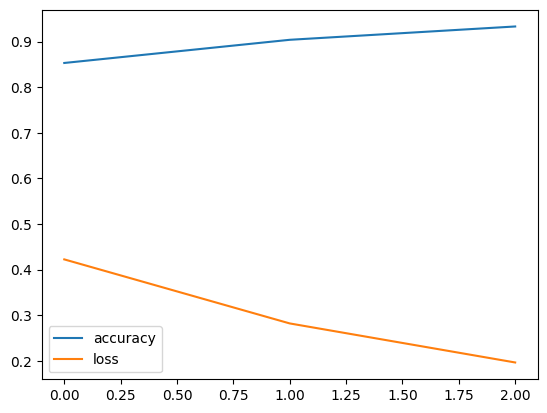

In [44]:
#Q13: How to Visualize Model Performance?
import matplotlib.pyplot as plt

history = model_rnn.history.history
plt.plot(history['accuracy'], label='accuracy')
plt.plot(history['loss'], label='loss')
plt.legend()
plt.show()


In [45]:
#Q14: How to Use Early Stopping?
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split data for validation
X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X, y, test_size=0.2, random_state=42)


early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Assuming model_rnn was defined and compiled in the previous cell
# If you run this cell independently, make sure model_rnn is available

history_rnn = model_rnn.fit(X_train_rnn, y_train_rnn, epochs=10, batch_size=32,
                          validation_data=(X_val_rnn, y_val_rnn),
                          callbacks=[early_stop])

Epoch 1/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9585 - loss: 0.1265 - val_accuracy: 0.9522 - val_loss: 0.1455
Epoch 2/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.9779 - loss: 0.0731 - val_accuracy: 0.9405 - val_loss: 0.1707
Epoch 3/10
620/620 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9843 - loss: 0.0498 - val_accuracy: 0.9411 - val_loss: 0.2017
